# Other Classification Exercise - KNN

###### <font color='red'>1)Load datasets 

In [36]:
# import all required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import display, Markdown
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets




%matplotlib inline

In [10]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df_wine.describe()
# no null values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
df_wine.info()
# all values are float so we are good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


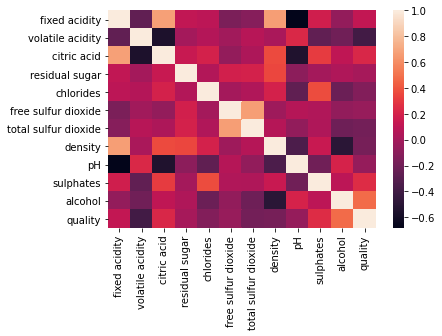

In [15]:
sns.heatmap(df_wine.corr())

###### <font color='red'>2)Split data

In [35]:
X = df_wine.loc[:,:'alcohol']
y = df_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
model = KNeighborsClassifier(n_neighbors=200)

In [44]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=200)

###### <font color='red'>2)Test Model


In [45]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.4675


In [50]:
for k in range(1,40,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    ac = accuracy_score(y_test, model.predict(X_test))
    print(k)
    print(ac)

1
0.515
3
0.44
5
0.4675
7
0.475
9
0.4725
11
0.46
13
0.4575
15
0.4675
17
0.48
19
0.485
21
0.495
23
0.4975
25
0.5075
27
0.5025
29
0.4925
31
0.495
33
0.5
35
0.505
37
0.5025
39
0.51


###### <font color='red'>4) validation of model


In [51]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  4,  9,  0,  0],
       [ 0,  0, 88, 76,  0,  0],
       [ 0,  0, 70, 99,  0,  0],
       [ 0,  0, 10, 38,  0,  0],
       [ 0,  0,  1,  4,  0,  0]], dtype=int64)

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'micro')

0.4675

In [56]:
for k in range(1,40,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    ac = accuracy_score(y_test, model.predict(X_test_scaled))
    print(k)
    print(ac)

1
0.6075
3
0.5375
5
0.5775
7
0.57
9
0.585
11
0.5775
13
0.5675
15
0.54
17
0.555
19
0.555
21
0.5425
23
0.5475
25
0.5425
27
0.535
29
0.5475
31
0.54
33
0.5475
35
0.535
37
0.5475
39
0.55


In [59]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\65909\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


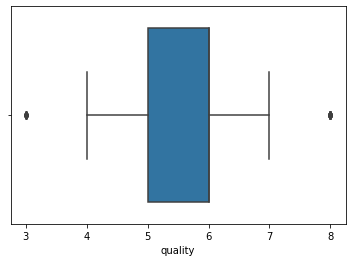

In [60]:
sns.boxplot(df_wine.quality)

In [ ]:
sns.boxplot(df_wine.quality)

In [61]:
def func(n):
    if (n <= 5):
        return 0
    else:
        return 1

In [62]:
df_wine['quality'] = df_wine['quality'].apply(lambda x: func(x))

In [63]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [64]:
X = df_wine.loc[:,:'alcohol']
y = df_wine.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
## try to scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [69]:
for k in range(1,100,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    ac = accuracy_score(y_test, model.predict(X_test_scaled))
    print(k)
    print(ac)

1
0.7375
3
0.7125
5
0.7025
7
0.6875
9
0.715
11
0.715
13
0.7175
15
0.7125
17
0.72
19
0.7125
21
0.7025
23
0.7075
25
0.7
27
0.7075
29
0.71
31
0.7075
33
0.7075
35
0.6975
37
0.7075
39
0.7075
41
0.7
43
0.7075
45
0.7025
47
0.705
49
0.7175
51
0.7125
53
0.715
55
0.71
57
0.7175
59
0.7225
61
0.72
63
0.7175
65
0.715
67
0.72
69
0.7225
71
0.72
73
0.7175
75
0.72
77
0.72
79
0.715
81
0.7175
83
0.725
85
0.7275
87
0.7275
89
0.73
91
0.7325
93
0.7325
95
0.7275
97
0.73
99
0.73


In [80]:
model = KNeighborsClassifier(n_neighbors = 60)
model.fit(X_train_scaled, y_train)
ac = accuracy_score(y_test, model.predict(X_test_scaled))

In [81]:
ac

0.72

In [82]:
y_pred=model.predict(X_test_scaled)

In [83]:
confusion_matrix(y_test,y_pred)

array([[126,  52],
       [ 60, 162]], dtype=int64)

In [84]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'micro')

0.72

In [86]:
df_wine.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [87]:
### test

In [88]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

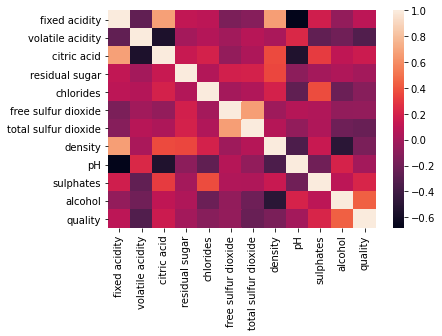

In [89]:
sns.heatmap(df_wine.corr())

In [90]:
new_X = df_wine[['volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.25, random_state=42)

In [92]:
## try to scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [94]:
for k in range(1,1000,2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train_scaled, y_train)
    ac = accuracy_score(y_test, model.predict(X_test_scaled))
    print(k)
    print(ac)

1
0.75
3
0.7525
5
0.7075
7
0.7
9
0.7125
11
0.725
13
0.725
15
0.7125
17
0.7025
19
0.7175
21
0.72
23
0.715
25
0.7225
27
0.72
29
0.7175
31
0.72
33
0.72
35
0.71
37
0.715
39
0.7175
41
0.7125
43
0.7075
45
0.705
47
0.7075
49
0.7125
51
0.7075
53
0.71
55
0.7125
57
0.7125
59
0.715
61
0.715
63
0.7075
65
0.7125
67
0.71
69
0.7125
71
0.7175
73
0.715
75
0.7075
77
0.7175
79
0.7125
81
0.7175
83
0.7175
85
0.72
87
0.72
89
0.715
91
0.71
93
0.71
95
0.7125
97
0.705
99
0.71
101
0.7125
103
0.7175
105
0.715
107
0.715
109
0.715
111
0.7125
113
0.71
115
0.7225
117
0.72
119
0.7075
121
0.715
123
0.71
125
0.72
127
0.7125
129
0.72
131
0.715
133
0.7125
135
0.7125
137
0.7175
139
0.7225
141
0.72
143
0.7175
145
0.7175
147
0.725
149
0.72
151
0.7225
153
0.7175
155
0.71
157
0.7175
159
0.72
161
0.7225
163
0.72
165
0.7225
167
0.725
169
0.7225
171
0.7225
173
0.7275
175
0.7225
177
0.7225
179
0.72
181
0.725
183
0.72
185
0.72
187
0.7225
189
0.7225
191
0.7225
193
0.7175
195
0.7175
197
0.72
199
0.7275
201
0.725
203
0.7225
205
0.722

KeyboardInterrupt: 